In [0]:


df1 = spark.read.format("csv").option("header", "true").load("dbfs:/FileStore/shared_uploads/sushmauppalapati12@gmail.com/anxiety_depression_data-2.csv")

In [0]:

df1.show(5)

+---+------+---------------+-----------------+-----------+---------------------+--------------------+-------------+----------------+------------+-----------------------------+-----------------+--------------+-------+----------+-------------+----------------+-----------+-----------------+-----------------------+----------------+
|Age|Gender|Education_Level|Employment_Status|Sleep_Hours|Physical_Activity_Hrs|Social_Support_Score|Anxiety_Score|Depression_Score|Stress_Level|Family_History_Mental_Illness|Chronic_Illnesses|Medication_Use|Therapy|Meditation|Substance_Use|Financial_Stress|Work_Stress|Self_Esteem_Score|Life_Satisfaction_Score|Loneliness_Score|
+---+------+---------------+-----------------+-----------+---------------------+--------------------+-------------+----------------+------------+-----------------------------+-----------------+--------------+-------+----------+-------------+----------------+-----------+-----------------+-----------------------+----------------+
| 56|  Mal

In [0]:
df1.printSchema()

root
 |-- Age: string (nullable = true)
 |-- Gender: string (nullable = true)
 |-- Education_Level: string (nullable = true)
 |-- Employment_Status: string (nullable = true)
 |-- Sleep_Hours: string (nullable = true)
 |-- Physical_Activity_Hrs: string (nullable = true)
 |-- Social_Support_Score: string (nullable = true)
 |-- Anxiety_Score: string (nullable = true)
 |-- Depression_Score: string (nullable = true)
 |-- Stress_Level: string (nullable = true)
 |-- Family_History_Mental_Illness: string (nullable = true)
 |-- Chronic_Illnesses: string (nullable = true)
 |-- Medication_Use: string (nullable = true)
 |-- Therapy: string (nullable = true)
 |-- Meditation: string (nullable = true)
 |-- Substance_Use: string (nullable = true)
 |-- Financial_Stress: string (nullable = true)
 |-- Work_Stress: string (nullable = true)
 |-- Self_Esteem_Score: string (nullable = true)
 |-- Life_Satisfaction_Score: string (nullable = true)
 |-- Loneliness_Score: string (nullable = true)



In [0]:
df1.describe().show()

+-------+-----------------+------+---------------+-----------------+------------------+---------------------+--------------------+-----------------+------------------+------------------+-----------------------------+------------------+--------------+-------------------+-------------------+-------------+-----------------+-----------------+-----------------+-----------------------+------------------+
|summary|              Age|Gender|Education_Level|Employment_Status|       Sleep_Hours|Physical_Activity_Hrs|Social_Support_Score|    Anxiety_Score|  Depression_Score|      Stress_Level|Family_History_Mental_Illness| Chronic_Illnesses|Medication_Use|            Therapy|         Meditation|Substance_Use| Financial_Stress|      Work_Stress|Self_Esteem_Score|Life_Satisfaction_Score|  Loneliness_Score|
+-------+-----------------+------+---------------+-----------------+------------------+---------------------+--------------------+-----------------+------------------+------------------+----------

In [0]:
from pyspark.sql.functions import  col
df1.select([col(c).isNull().alias(c) for c in df1.columns]).show()

+-----+------+---------------+-----------------+-----------+---------------------+--------------------+-------------+----------------+------------+-----------------------------+-----------------+--------------+-------+----------+-------------+----------------+-----------+-----------------+-----------------------+----------------+
|  Age|Gender|Education_Level|Employment_Status|Sleep_Hours|Physical_Activity_Hrs|Social_Support_Score|Anxiety_Score|Depression_Score|Stress_Level|Family_History_Mental_Illness|Chronic_Illnesses|Medication_Use|Therapy|Meditation|Substance_Use|Financial_Stress|Work_Stress|Self_Esteem_Score|Life_Satisfaction_Score|Loneliness_Score|
+-----+------+---------------+-----------------+-----------+---------------------+--------------------+-------------+----------------+------------+-----------------------------+-----------------+--------------+-------+----------+-------------+----------------+-----------+-----------------+-----------------------+----------------+
|fal

In [0]:
from pyspark.sql.functions import sum
df1.select([sum(col(c).isNull().cast("int")).alias(c) for c in df1.columns]).show()

+---+------+---------------+-----------------+-----------+---------------------+--------------------+-------------+----------------+------------+-----------------------------+-----------------+--------------+-------+----------+-------------+----------------+-----------+-----------------+-----------------------+----------------+
|Age|Gender|Education_Level|Employment_Status|Sleep_Hours|Physical_Activity_Hrs|Social_Support_Score|Anxiety_Score|Depression_Score|Stress_Level|Family_History_Mental_Illness|Chronic_Illnesses|Medication_Use|Therapy|Meditation|Substance_Use|Financial_Stress|Work_Stress|Self_Esteem_Score|Life_Satisfaction_Score|Loneliness_Score|
+---+------+---------------+-----------------+-----------+---------------------+--------------------+-------------+----------------+------------+-----------------------------+-----------------+--------------+-------+----------+-------------+----------------+-----------+-----------------+-----------------------+----------------+
|  0|     

In [0]:
df1.select("Gender").distinct().show()


+----------+
|    Gender|
+----------+
|    Female|
|     Other|
|Non-Binary|
|      Male|
+----------+



In [0]:
df1.dtypes

Out[14]: [('Age', 'string'),
 ('Gender', 'string'),
 ('Education_Level', 'string'),
 ('Employment_Status', 'string'),
 ('Sleep_Hours', 'string'),
 ('Physical_Activity_Hrs', 'string'),
 ('Social_Support_Score', 'string'),
 ('Anxiety_Score', 'string'),
 ('Depression_Score', 'string'),
 ('Stress_Level', 'string'),
 ('Family_History_Mental_Illness', 'string'),
 ('Chronic_Illnesses', 'string'),
 ('Medication_Use', 'string'),
 ('Therapy', 'string'),
 ('Meditation', 'string'),
 ('Substance_Use', 'string'),
 ('Financial_Stress', 'string'),
 ('Work_Stress', 'string'),
 ('Self_Esteem_Score', 'string'),
 ('Life_Satisfaction_Score', 'string'),
 ('Loneliness_Score', 'string')]

In [0]:
from pyspark.sql.functions import when

df1 = df1.withColumn("Gender_Code", 
    when(df1["Gender"] == "male", 0)
   .when(df1["Gender"] == "female", 1)
   .otherwise(2))


In [0]:
df1.dtypes

Out[17]: [('Age', 'string'),
 ('Gender', 'string'),
 ('Education_Level', 'string'),
 ('Employment_Status', 'string'),
 ('Sleep_Hours', 'string'),
 ('Physical_Activity_Hrs', 'string'),
 ('Social_Support_Score', 'string'),
 ('Anxiety_Score', 'string'),
 ('Depression_Score', 'string'),
 ('Stress_Level', 'string'),
 ('Family_History_Mental_Illness', 'string'),
 ('Chronic_Illnesses', 'string'),
 ('Medication_Use', 'string'),
 ('Therapy', 'string'),
 ('Meditation', 'string'),
 ('Substance_Use', 'string'),
 ('Financial_Stress', 'string'),
 ('Work_Stress', 'string'),
 ('Self_Esteem_Score', 'string'),
 ('Life_Satisfaction_Score', 'string'),
 ('Loneliness_Score', 'string'),
 ('Gender_Code', 'int')]

In [0]:
df1 = df1.withColumn("Total_Mental_Health_Score", 
    df1["Anxiety_Score"] + df1["Depression_Score"] + df1["Stress_Level"])


In [0]:
from pyspark.sql.functions import when

df1 = df1.withColumn("High_Stress_Flag", 
    when(df1["Stress_Level"] > 7, 1).otherwise(0))


In [0]:
df_final = df1.select(
    "Age", "Gender_Code", "Employment_Status", "Anxiety_Score", 
    "Depression_Score", "Stress_Level", "Total_Mental_Health_Score", 
    "High_Stress_Flag", "Life_Satisfaction_Score"
)


In [0]:
df_final.write \
    .partitionBy("Gender_Code") \
    .mode("overwrite") \
    .parquet("/FileStore/tables/cleaned_mental_health_data")


In [0]:
%fs
ls /FileStore/tables/cleaned_mental_health_data/


path,name,size,modificationTime
dbfs:/FileStore/tables/cleaned_mental_health_data/Gender_Code=2/,Gender_Code=2/,0,0
dbfs:/FileStore/tables/cleaned_mental_health_data/Gender_code=2/,Gender_code=2/,0,0
dbfs:/FileStore/tables/cleaned_mental_health_data/_SUCCESS,_SUCCESS,0,1742776504000
dbfs:/FileStore/tables/cleaned_mental_health_data/_committed_6861316898813966659,_committed_6861316898813966659,35,1742776353000


In [0]:
df_cleaned = spark.read.parquet("/FileStore/tables/cleaned_mental_health_data")
df_cleaned.show(5)


+---+-----------------+-------------+----------------+------------+-------------------------+----------------+-----------------------+-----------+
|Age|Employment_Status|Anxiety_Score|Depression_Score|Stress_Level|Total_Mental_Health_Score|High_Stress_Flag|Life_Satisfaction_Score|Gender_Code|
+---+-----------------+-------------+----------------+------------+-------------------------+----------------+-----------------------+-----------+
| 56|       Unemployed|            4|               2|           9|                     15.0|               1|                      5|          2|
| 69|          Retired|           18|               7|           6|                     31.0|               0|                      4|          2|
| 46|         Employed|            5|              13|           8|                     26.0|               1|                      1|          2|
| 32|       Unemployed|            6|               3|           4|                     13.0|               0|        

In [0]:
df_final.groupBy("Gender_Code").count().show()


+-----------+-----+
|Gender_Code|count|
+-----------+-----+
|          2| 1200|
+-----------+-----+



In [0]:
df_final.write \
    .partitionBy("Gender_Code") \
    .mode("overwrite") \
    .parquet("/FileStore/tables/cleaned_mental_health_data")


In [0]:
%fs
ls /FileStore/tables/cleaned_mental_health_data/


path,name,size,modificationTime
dbfs:/FileStore/tables/cleaned_mental_health_data/Gender_Code=2/,Gender_Code=2/,0,0
dbfs:/FileStore/tables/cleaned_mental_health_data/Gender_code=2/,Gender_code=2/,0,0
dbfs:/FileStore/tables/cleaned_mental_health_data/_SUCCESS,_SUCCESS,0,1742776587000
dbfs:/FileStore/tables/cleaned_mental_health_data/_committed_6861316898813966659,_committed_6861316898813966659,35,1742776353000


In [0]:
df1.select("Gender").distinct().show()


+----------+
|    Gender|
+----------+
|    Female|
|     Other|
|Non-Binary|
|      Male|
+----------+



In [0]:
df1.select("Gender_Code").distinct().show()


+-----------+
|Gender_Code|
+-----------+
|          2|
+-----------+



In [0]:
df1.groupBy("Gender_Code").count().show()


+-----------+-----+
|Gender_Code|count|
+-----------+-----+
|          2| 1200|
+-----------+-----+



In [0]:
df1.select("Gender", "Gender_Code").distinct().show(100)


+----------+-----------+
|    Gender|Gender_Code|
+----------+-----------+
|     Other|          2|
|    Female|          2|
|Non-Binary|          2|
|      Male|          2|
+----------+-----------+



In [0]:
from pyspark.sql.functions import lower, trim

df1 = df1.withColumn("Gender", trim(lower(df1["Gender"])))


In [0]:
from pyspark.sql.functions import when

df1 = df1.withColumn("Gender_Code", 
    when(df1["Gender"] == "male", 0)
   .when(df1["Gender"] == "female", 1)
   .when(df1["Gender"] == "non-binary", 2)
   .otherwise(3))  # other/unknowns


In [0]:
df1.select("Gender", "Gender_Code").distinct().show()
df1.groupBy("Gender_Code").count().show()


+----------+-----------+
|    Gender|Gender_Code|
+----------+-----------+
|non-binary|          2|
|     other|          3|
|      male|          0|
|    female|          1|
+----------+-----------+

+-----------+-----+
|Gender_Code|count|
+-----------+-----+
|          1|  569|
|          3|   21|
|          2|   90|
|          0|  520|
+-----------+-----+



In [0]:
df_final = df1.select(
    "Age", "Gender_Code", "Employment_Status", "Anxiety_Score", 
    "Depression_Score", "Stress_Level", "Total_Mental_Health_Score", 
    "High_Stress_Flag", "Life_Satisfaction_Score"
)

df_final.write \
    .partitionBy("Gender_Code") \
    .mode("overwrite") \
    .parquet("/FileStore/tables/cleaned_mental_health_data")


In [0]:
%fs
ls /FileStore/tables/cleaned_mental_health_data/


path,name,size,modificationTime
dbfs:/FileStore/tables/cleaned_mental_health_data/Gender_Code=0/,Gender_Code=0/,0,0
dbfs:/FileStore/tables/cleaned_mental_health_data/Gender_Code=1/,Gender_Code=1/,0,0
dbfs:/FileStore/tables/cleaned_mental_health_data/Gender_Code=2/,Gender_Code=2/,0,0
dbfs:/FileStore/tables/cleaned_mental_health_data/Gender_Code=3/,Gender_Code=3/,0,0
dbfs:/FileStore/tables/cleaned_mental_health_data/Gender_code=2/,Gender_code=2/,0,0
dbfs:/FileStore/tables/cleaned_mental_health_data/_SUCCESS,_SUCCESS,0,1742777598000
dbfs:/FileStore/tables/cleaned_mental_health_data/_committed_6861316898813966659,_committed_6861316898813966659,35,1742776353000


In [0]:
%fs
ls /FileStore/tables/cleaned_mental_health_data/Gender_Code=0/


path,name,size,modificationTime
dbfs:/FileStore/tables/cleaned_mental_health_data/Gender_Code=0/_SUCCESS,_SUCCESS,0,1742777598000
dbfs:/FileStore/tables/cleaned_mental_health_data/Gender_Code=0/_committed_8875236322318088447,_committed_8875236322318088447,123,1742777597000
dbfs:/FileStore/tables/cleaned_mental_health_data/Gender_Code=0/_started_8875236322318088447,_started_8875236322318088447,0,1742777597000
dbfs:/FileStore/tables/cleaned_mental_health_data/Gender_Code=0/part-00000-tid-8875236322318088447-2af64977-32bc-44d9-9556-34c75079bf2d-33-1.c000.snappy.parquet,part-00000-tid-8875236322318088447-2af64977-32bc-44d9-9556-34c75079bf2d-33-1.c000.snappy.parquet,5584,1742777597000


In [0]:
%fs
ls /FileStore/tables/cleaned_mental_health_data/Gender_Code=1/


path,name,size,modificationTime
dbfs:/FileStore/tables/cleaned_mental_health_data/Gender_Code=1/_SUCCESS,_SUCCESS,0,1742777597000
dbfs:/FileStore/tables/cleaned_mental_health_data/Gender_Code=1/_committed_8875236322318088447,_committed_8875236322318088447,123,1742777597000
dbfs:/FileStore/tables/cleaned_mental_health_data/Gender_Code=1/_started_8875236322318088447,_started_8875236322318088447,0,1742777597000
dbfs:/FileStore/tables/cleaned_mental_health_data/Gender_Code=1/part-00000-tid-8875236322318088447-2af64977-32bc-44d9-9556-34c75079bf2d-33-2.c000.snappy.parquet,part-00000-tid-8875236322318088447-2af64977-32bc-44d9-9556-34c75079bf2d-33-2.c000.snappy.parquet,5793,1742777597000


In [0]:
# Register the DataFrame as a temporary SQL table
df_cleaned.createOrReplaceTempView("mental_health_data")


In [0]:
spark.sql("""
    SELECT Gender_Code,
           COUNT(*) AS total,
           AVG(Total_Mental_Health_Score) AS avg_score,
           AVG(Life_Satisfaction_Score) AS avg_life
    FROM mental_health_data
    GROUP BY Gender_Code
""").show()


---------------------------------------------------------------------------
Py4JJavaError                             Traceback (most recent call last)
File <command-2523299416587854>:1
----> 1 spark.sql("""
      2     SELECT Gender_Code,
      3            COUNT(*) AS total,
      4            AVG(Total_Mental_Health_Score) AS avg_score,
      5            AVG(Life_Satisfaction_Score) AS avg_life
      6     FROM mental_health_data
      7     GROUP BY Gender_Code
      8 """).show()

File /databricks/spark/python/pyspark/instrumentation_utils.py:48, in _wrap_function.<locals>.wrapper(*args, **kwargs)
     46 start = time.perf_counter()
     47 try:
---> 48     res = func(*args, **kwargs)
     49     logger.log_success(
     50         module_name, class_name, function_name, time.perf_counter() - start, signature
     51     )
     52     return res

File /databricks/spark/python/pyspark/sql/dataframe.py:920, in DataFrame.show(self, n, truncate, vertical)
    914     raise PySparkTyp

In [0]:
spark.catalog.clearCache()


In [0]:
df_cleaned = spark.read.parquet("/FileStore/tables/cleaned_mental_health_data")
df_cleaned.createOrReplaceTempView("mental_health_data")


In [0]:
spark.sql("""
    SELECT Gender_Code, COUNT(*), AVG(Total_Mental_Health_Score)
    FROM mental_health_data
    GROUP BY Gender_Code
""").show()


+-----------+--------+------------------------------+
|Gender_Code|count(1)|avg(Total_Mental_Health_Score)|
+-----------+--------+------------------------------+
|          1|     569|             26.15992970123023|
|          0|     520|            25.986538461538462|
|          2|      90|            26.877777777777776|
|          3|      21|            26.523809523809526|
+-----------+--------+------------------------------+



In [0]:
df_cleaned.describe().show()


+-------+-----------------+-----------------+-----------------+------------------+------------------+-------------------------+-------------------+-----------------------+------------------+
|summary|              Age|Employment_Status|    Anxiety_Score|  Depression_Score|      Stress_Level|Total_Mental_Health_Score|   High_Stress_Flag|Life_Satisfaction_Score|       Gender_Code|
+-------+-----------------+-----------------+-----------------+------------------+------------------+-------------------------+-------------------+-----------------------+------------------+
|  count|             1200|             1200|             1200|              1200|              1200|                     1200|               1200|                   1200|              1200|
|   mean|          46.3175|             null|            10.47|10.674166666666666|5.0008333333333335|                   26.145|0.21833333333333332|                   5.12|0.6766666666666666|
| stddev|16.45115682510109|             null|

In [0]:
spark.sql("""
    SELECT Gender_Code, COUNT(*), AVG(Stress_Level)
    FROM mental_health_data
    GROUP BY Gender_Code
""").show()

+-----------+--------+-----------------+
|Gender_Code|count(1)|avg(Stress_Level)|
+-----------+--------+-----------------+
|          1|     569|4.927943760984183|
|          0|     520|5.048076923076923|
|          2|      90|5.122222222222222|
|          3|      21|5.285714285714286|
+-----------+--------+-----------------+



In [0]:
df_cleaned.stat.corr("Total_Mental_Health_Score", "Life_Satisfaction_Score")


---------------------------------------------------------------------------
IllegalArgumentException                  Traceback (most recent call last)
File <command-2523299416587860>:1
----> 1 df_cleaned.stat.corr("Total_Mental_Health_Score", "Life_Satisfaction_Score")

File /databricks/spark/python/pyspark/instrumentation_utils.py:48, in _wrap_function.<locals>.wrapper(*args, **kwargs)
     46 start = time.perf_counter()
     47 try:
---> 48     res = func(*args, **kwargs)
     49     logger.log_success(
     50         module_name, class_name, function_name, time.perf_counter() - start, signature
     51     )
     52     return res

File /databricks/spark/python/pyspark/sql/dataframe.py:5375, in DataFrameStatFunctions.corr(self, col1, col2, method)
   5374 def corr(self, col1: str, col2: str, method: Optional[str] = None) -> float:
-> 5375     return self.df.corr(col1, col2, method)

File /databricks/spark/python/pyspark/instrumentation_utils.py:43, in _wrap_function.<locals>.wrapp

In [0]:
df_cleaned.stat.crosstab("Gender_Code", "High_Stress_Flag").show()


+----------------------------+---+---+
|Gender_Code_High_Stress_Flag|  0|  1|
+----------------------------+---+---+
|                           3| 15|  6|
|                           0|404|116|
|                           1|447|122|
|                           2| 72| 18|
+----------------------------+---+---+



In [0]:
pdf = df_cleaned.toPandas()


Out[51]: <AxesSubplot:xlabel='Gender_Code', ylabel='Life_Satisfaction_Score'>

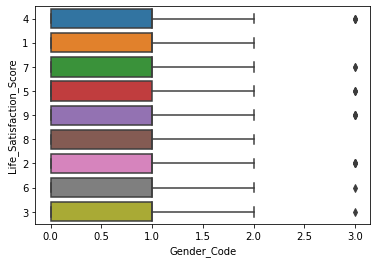

In [0]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.boxplot(x="Gender_Code", y="Life_Satisfaction_Score", data=pdf)
